### Problem Description

Write some details of the problem ... also mention the link of the dataset

### Import Packages

In [5]:
# Add environment Packages paths to conda
import os, sys
# env_name = "food_review"
# sys.path.append(f"C:\\Environments\\{env_name}\\lib\\site-packages\\")

import pandas as pd
import numpy as np

# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
from nltk.corpus import stopwords # Stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

### Read Dataset

In [13]:
%%time
df = pd.read_csv('data/Reviews.csv')

In [14]:
f"{df.shape[0]:,} Review"

In [8]:
cols = ['Text', 'Score']
df_text = df[cols].copy()
df_text.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


### Drop Duplicates
Save the Cleaned data-frame also with the variable `df_text`

In [1]:
## Write your code here

### Target Variable Pre-Processing
`target` will be 
 - 0 if score < 3 
 - 1 otherwise

In [10]:
df_text['target'] = ## Write your code here

#### Plot Countplot for target Variable

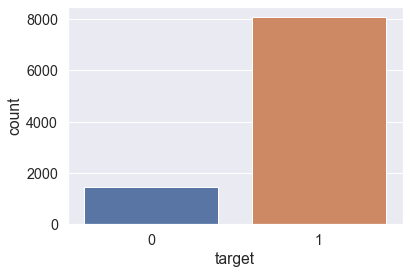

In [17]:
## Write your code here

Notice how such variance is huge ...   
Then we need to down-sample such data ... by which both the positive and negative classes are balanced.

### Balance Data Target

In [12]:
# Sample from positive reviews Same number of negative reviews
NEG_N = df_text.target.value_counts()[0]
df_pos = df_text[df_text['target'] == 1]['Text'].sample(NEG_N, replace=False)
df_text_balanced = pd.concat([df_text.iloc[df_pos.index], df_text[df_text.target == 0]])

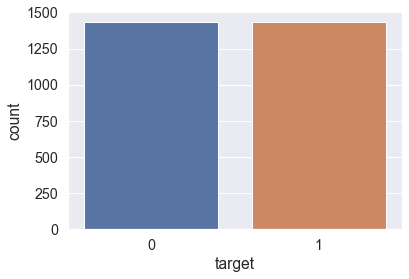

In [16]:
## PLot the target again after balancing
## Write your code here

### Text Pre-Processing

In [18]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
lemmatizer= WordNetLemmatizer()

In [2]:
## Clean your reviews using stemmer, lemmatizer & stopwords

### Split Test & Training Data

In [27]:
X = ... ## Write your code here
y = ... ## Write your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Text Embedding
 - Use `TfidfVectorizer`
 - `fit` on the training data only
 - `transform` on training and test 

In [28]:
## TFIDF embedding for the Description
vectorizer = ... ## Write your code here
# fit on training (such vectorizer will be saved for deployment)
vectorizer_tfidf = ... ## Write your code here
# transform on training data
X_train = ... ## Write your code here
# transform on testing data
X_test = ... ## Write your code here

2866 2006 860


In [4]:
# See the dimensions of your data embeddings before entering to the model
X_train.shape, X_test.shape

### Modelling

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

##### Sklearn framework steps
 - init
 - fit
 - predict

In [6]:
## initialize your Model
clf = ... 
# Fit your Model on the Training Dataset
...
# Predict on Test data
preds = ...
# Calculate Model Accuracy
acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

### Raw Instance Prediction

In [7]:
def raw_test(review, model, vectorizer):
    # Clean Review
    review_c = ...
    # Embed review using tf-idf vectorizer
    embedding = ...
    # Predict using your model
    prediction = ...
    # Return the Sentiment Prediction
    return "Positive" if prediction == 1 else "Negative"

In [34]:
review_1 = "That's a good Dish, Good Job"
review_2 = "That's the worst Dish ever tasted"

In [35]:
raw_test(review_1, clf, vectorizer_tfidf)

'Positive'

In [36]:
raw_test(review_2, clf, vectorizer_tfidf)

'Negative'

### Saving Models for Deployment

In [37]:
import pickle

In [12]:
model_name = 'rf_model.pk'
vectorizer_name = 'tfidf_vectorizer.pk'
model_path = os.path.join('/', model_name)
vect_path = os.path.join('/', vectorizer_name)

... ## Save model
... ## Save tfidf-vectorizer

### Load model Again and test them

In [10]:
loaded_model = ...
loaded_vect = ...

In [40]:
raw_test(review_1, loaded_model, loaded_vect)

'Positive'

In [41]:
raw_test(review_2, loaded_model, loaded_vect)

'Negative'

# Great Job !
### Now Deploy your ML model using Streamlit Framework